In [ ]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [159]:
df = pd.read_csv('HEROMOTOCO.csv')

In [160]:
for i in range(len(df)):
  if numpy.isnan(df.at[i, 'Close']):
    df.drop(i, axis = 0, inplace = True)

In [ ]:
DF = df['Open']
DF.head()

0    1845.00
1    1820.00
2    1821.25
3    1803.75
4    1851.00
Name: Open, dtype: float64

In [ ]:
scale = MinMaxScaler(feature_range=(0,1))
DF = scale.fit_transform(numpy.array(DF).reshape(-1,1))

In [ ]:
valid_percent = 0.15
test_percent = 0.15
train_percent = 1 - (valid_percent + test_percent)

L = len(DF)

train_size = int(train_percent * L)
valid_size = int(valid_percent * L)
test_size = int(test_percent * L)

train_data = DF[0:train_size,:]
valid_data = DF[train_size:train_size + valid_size, :]
test_data = DF[train_size + valid_size:train_size + valid_size + test_size, :]

In [ ]:
def create_inout_sequence(input_data, tw):
  input_seq = []
  input_label = []
  L = len(input_data)
  for i in range(L-tw):
    input_seq.append(input_data[i:i+tw,:])
    input_label.append(input_data[i+tw,:])
    
  return numpy.array(input_seq), numpy.array(input_label)

In [ ]:
X_train, y_train = create_inout_sequence(train_data, 30)
X_valid, y_valid = create_inout_sequence(valid_data, 30)
X_test, y_test = create_inout_sequence(test_data, 30) 

In [ ]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(30,1), dropout = 0.15))
model.add(LSTM(100,return_sequences=True, dropout = 0.15))
model.add(LSTM(100))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 30, 100)           40800     
_________________________________________________________________
lstm_22 (LSTM)               (None, 30, 100)           80400     
_________________________________________________________________
lstm_23 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 201,701
Trainable params: 201,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, 32, 100, 1, validation_data=(X_valid, y_valid))

Epoch 1/100
37/37 [==============================] - 1s 33ms/step - loss: 0.0334 - val_loss: 0.0048
Epoch 2/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.0037
Epoch 3/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 4/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 5/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0045 - val_loss: 0.0053
Epoch 6/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0039
Epoch 7/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0046 - val_loss: 0.0040
Epoch 8/100
37/37 [==============================] - 0s 10ms/step - loss: 0.0047 - val_loss: 0.0036
Epoch 9/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0032
Epoch 10/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0031
Epo

In [ ]:
train_predict = model.predict(X_train)
valid_predict = model.predict(X_valid)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scale.inverse_transform(train_predict)
valid_predict = scale.inverse_transform(valid_predict)
test_predict = scale.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

2825.1382309997107

In [ ]:
math.sqrt(mean_squared_error(y_valid,valid_predict))

2732.095668675885

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

2300.935167064921

In [ ]:
lookback = 30
trainpredict = numpy.empty_like(DF)
trainpredict[:,:] = numpy.nan
trainpredict[lookback:train_size, :] = train_predict

In [ ]:
validpredict = numpy.empty_like(DF)
validpredict[:,:] = numpy.nan
validpredict[train_size + lookback:train_size + valid_size, :] = valid_predict

In [ ]:
testpredict = numpy.empty_like(DF)
testpredict[:,:] = numpy.nan
testpredict[train_size + valid_size + lookback: -2, :] = test_predict

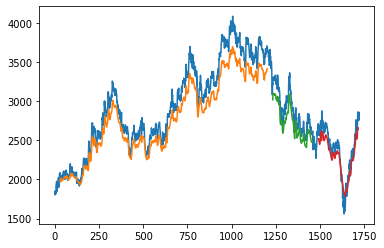

In [ ]:
df['Open'].plot()
plt.plot(trainpredict)
plt.plot(validpredict)
plt.plot(testpredict)

In [ ]:
model.save('/content/drive/My Drive/Stock_Prediction_LSTM')

INFO:tensorflow:Assets written to: /content/drive/My Drive/Stock_Prediction_LSTM/assets
